<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-1.-Откройте-файл-с-данными-и-изучите-общую-информацию" data-toc-modified-id="Шаг-1.-Откройте-файл-с-данными-и-изучите-общую-информацию-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Шаг 1. Откройте файл с данными и изучите общую информацию</a></span></li><li><span><a href="#Шаг-2.-Предобработка-данных" data-toc-modified-id="Шаг-2.-Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Шаг 2. Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Замена типа данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Категоризация-данных" data-toc-modified-id="Категоризация-данных-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Категоризация данных</a></span></li></ul></li><li><span><a href="#Шаг-3.-Ответьте-на-вопросы" data-toc-modified-id="Шаг-3.-Ответьте-на-вопросы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Шаг 3. Ответьте на вопросы</a></span></li><li><span><a href="#Шаг-4.-Общий-вывод" data-toc-modified-id="Шаг-4.-Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Шаг 4. Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

<div class="alert alert-block alert-warning">
<b>Remarks:</b> 

Отлично, что у проекта есть введение. Однако стоит задуматься, как еще его можно дополнить, чтобы сделать более ценным для читателя. В студенческом ноушене (если нет доступа, спроси куратора) есть статья о том, как мы оформляем работы. 
    
Также советую тебе взглянуть на <a href="https://www.kaggle.com/notebooks/">работы</a> профессиональных аналитиков, чтобы оценить, как другие люди оформляют и проводят исследования. </div>


## Шаг 1. Откройте файл с данными и изучите общую информацию

In [23]:
import pandas as pd 
import seaborn as sns

data = pd.read_csv('/datasets/data.csv')
data.set_axis(['children',
               'days_employed',
               'age',
               'education',
               'education_id',
               'family_status',
               'family_status_id',
               'gender',
               'income_type',
               'debt',
               'total_income',
               'purpose'],
              axis='columns',inplace=True)# переименование столбца в age
data['education'] = data['education'].str.lower()# использование нижнего регистра в столбце с образованием
data.info()# получение инормации о таблице и используемых типах данных
data.isna().sum()# получение информации о количестве и месторахождении пропусков
#print (data.head(15))# первые 15 строк таблицы
#print (data.tail(10)) # последние 10 строк таблицы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
age                 21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


children               0
days_employed       2174
age                    0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

<div class="alert alert-block alert-warning">
<b>Remarks:</b> 
   
- лучше собирать все импорты, настройки и ключевые константы в начале проекта - так в нем будет гораздо проще ориентироваться ✔
- стоит отделять импорты от открытия датасета. Это делается для того, чтобы иметь возмонжность в любой момент дописать нвоые библиотеки, перезапустить ячейку с импортами и продолжить работу, не перетирая датасет. ✔
- функция `describe()` может быть очень полезна при знакомстве с датасетом, советую её тут использовать. Советую почитать про её аргументы - пригодится в следующих проектах, а также рекомендую рассматривать её в транспонированном виде - в больших датасетах будет гораздо удобнее - `df.describe().T` 

**Вывод**

В таблице данных обнаружены следующие элементы: пропуски, верхний регистр, отрицательные значения, дубликаты

## Шаг 2. Предобработка данных

### Обработка пропусков

In [25]:
total_income_avg = data['total_income'].mean() #total_income - это пропуск количественных переменных,заполним средним арифметическим
data['total_income'] = data['total_income'].fillna (value = total_income_avg)
days_employed_avg = data['days_employed'].mean() #days_employed - это пропуск количественных переменных,заполним средним арифметическим
data['days_employed'] = data['days_employed'].fillna (value = days_employed_avg)#days_employed - это пропуск количественных переменных,заполним средним арифметическим
data['days_employed'] = data['days_employed'].abs()#сделаем значения положительными
data['children'] = data['children'].abs()
data.isna().sum()
display (data.head(15))


,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,152.779569,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,6929.865299,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


<div class="alert alert-block alert-warning">
<b>Remarks:</b> 
   
- старайся комментарии к исследованию всегда писать в маркдаун-ячейках, # обычно используется для технических пояснений к нетривиальным участкам кода
- при выводе в аутпут табличных данных лучше воспользоваться методом `display()` вместо `print()`

**Вывод**

Пропуски составляют 10% от общего числа данных - это довольно много. Удалять нельзя
Есть корреляция в возникновении пропусков: равное количество респондентов не дали данных о своем доходе и соответственно днях работы. 
Возможно у них не было этого вопроса в анкете, возможно они скрывают свои доходы и соотвественно дни работы, которые считаются системой автоматически. 
Чаще всего у респондентов среднее образование
В данной ситуации больше подойдет метод стохастической линейной регрессии для заполнения пропусков
Пока его не прошли в курсе -- будем использовать заполенение средним арифметическим. 

### Замена типа данных

In [27]:
data['gender'] = data['gender'].replace('XNA', 'F')#заменили значение XNA нв F
data['children'] = data['children'].replace(20, 2)# убрали анамальное значение 20 детей. Скорее всего там лишний ноль
data['purpose'] = data['purpose'].replace('ремонт жилью','ремонт жилья')
data['days_employed'] = data['days_employed'].astype('int')# заменили float на int для минимизации места
data['total_income'] = data['total_income'].astype('int')
#data ['days_employed'] = data ['days_employed']/365# аномальные значения. больше 930 лет стажа (ого!)
print (data[data['days_employed'] >= 47*365] ['days_employed'].count())#5621 значение больше 47 (65 пенсионный возраст - 18) лет рабочего стажа. это аномальные значения, заменим их
data.loc[data['days_employed'] > 17155, 'days_employed'] = 17155 #заменили все аномальные занчения на максимум
print (data['days_employed'])
#data.info()
#print (data['income_type'].unique())
#print (data['age'].unique())
#print (data['gender'].unique())
#print (data['children'].unique())
#print (data)


5621
0         8437
1         4024
2         5623
3         4124
4        17155
         ...  
21520     4529
21521    17155
21522     2113
21523     3112
21524     1984
Name: days_employed, Length: 21525, dtype: int64


<div class="alert alert-block alert-warning">
<b>Remarks:</b> 
    
Потенциал для эффективного изменения типов тут очень широк.
    
Давай я дам тебе две классные статьи, а ты попробуешь изменить типы данных на еще более подходящие и замеришь, сколько памяти в % ты сэкономишь:
    
https://pyprog.pro/data_types.html
    
https://habr.com/ru/company/ruvds/blog/442516/
    
Также обрати внимание на пары столбцов `education - education_id` и `family_status - family_status_id`

**Вывод**

Подготовка данных для работы: очищние данных и изменение типа на целочисленные значения для упрощения расчетов и экономии места в памяти, очищение ошибки в данных о днях работы (замена аномальных на максимальное значение 17155 дней)
Также заменили значение XNA нв F в колонке "пол" ,т.к. гипотеза строилась вне зависимоти от пола, то можно сюда поставить любой пол. Также можно было просто удалить эту строку, т.к. она всего одна во всей таблице и на результат не сильно повлияет. 

### Обработка дубликатов

In [32]:
display (data[data.duplicated(keep=False)].head(10))
print (data.duplicated().sum())
print (data['total_income'].value_counts()) #проверили дубликаты по доходу

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
120,0,17155,46,среднее,1,женат / замужем,0,F,сотрудник,0,167422,высшее образование
520,0,17155,35,среднее,1,гражданский брак,1,F,сотрудник,0,167422,сыграть свадьбу
541,0,17155,57,среднее,1,женат / замужем,0,F,сотрудник,0,167422,сделка с подержанным автомобилем
554,0,17155,60,среднее,1,женат / замужем,0,M,сотрудник,0,167422,покупка недвижимости
680,1,17155,30,высшее,0,женат / замужем,0,F,госслужащий,0,167422,покупка жилья для семьи
1005,0,17155,62,среднее,1,женат / замужем,0,F,пенсионер,0,167422,ремонт жилья
1191,0,17155,61,среднее,1,женат / замужем,0,F,пенсионер,0,167422,операции с недвижимостью
1431,0,17155,41,среднее,1,женат / замужем,0,F,сотрудник,0,167422,покупка жилья для семьи
1511,0,17155,58,высшее,0,Не женат / не замужем,4,F,пенсионер,0,167422,дополнительное образование
1681,0,17155,57,среднее,1,гражданский брак,1,F,пенсионер,0,167422,на проведение свадьбы


71
167422    2174
244123       3
98974        3
150684       3
154199       3
          ... 
109583       1
101387       1
138249       1
280240       1
264193       1
Name: total_income, Length: 18607, dtype: int64


**Вывод**

Во всей таблице 71 дубликат. Это значение менее одного процента и связано с заменами, производимыми выше. 
То есть мы заменили все дни работы на максимальное - 17155 и total_income на среднее арифметическое 167422. Оставим дубликаты без изменений, они не сильно повлияют на решение проекта 

### Лемматизация

In [16]:
from pymystem3 import Mystem 
m = Mystem()
#purpose_unique = []
#purpose_unique = data['purpose'].unique()
#print (purpose_unique)#узнаем сколько всего целей для организации цикла
def category_of_purpose(row):
    lem_purpose = m.lemmatize(row['purpose'])
    if 'автомобиль' in lem_purpose:
        return 'автомобиль'
    if ('жилье' in lem_purpose) or ('недвижимость' in lem_purpose ):
        return 'недвижимость'
    if ('образование' in lem_purpose):
        return 'обучение'
    if ('свадьба' in lem_purpose):
        return 'свадьба'
    else:
        return 'не определено'
data['category'] = data.apply(category_of_purpose, axis=1)
print (data.tail())
#from collections import Counter 
#print(Counter(lst))

       children  days_employed  age education  education_id     family_status  \
21520         1           4529   43   среднее             1  гражданский брак   
21521         0          17155   67   среднее             1   женат / замужем   
21522         1           2113   38   среднее             1  гражданский брак   
21523         3           3112   38   среднее             1   женат / замужем   
21524         2           1984   40   среднее             1   женат / замужем   

       family_status_id gender income_type  debt  total_income  \
21520                 1      F   компаньон     0        224791   
21521                 0      F   пенсионер     0        155999   
21522                 1      M   сотрудник     1         89672   
21523                 0      M   сотрудник     1        244093   
21524                 0      F   сотрудник     0         82047   

                            purpose      category  
21520             операции с жильем  недвижимость  
21521       

<div class="alert alert-block alert-warning">
<b>Remarks:</b> 
    
импортам место в начале проекта

**Вывод**

Произведена проверка уникальных значений в столбце  purpose. На основе полученных данных применена лемматизация.

### Категоризация данных

In [17]:
def children_status (kids):
    if kids['children'] != 0:
        return 'есть дети'
    if kids ['children'] == 0:
        return 'нет детей'
data ['children_status'] = data.apply (children_status, axis = 1)
#print (data.head(10))

def debt_status (row):
    if row ['debt'] == 1:
        return 'есть задолженность'
    else:
        return 'нет задолженности'
data ['debt_status'] = data.apply (debt_status, axis = 1)
#print (data.tail(10))

def income_status (row):
    if row ['total_income'] < 100000:
        return 'низкий уровень дохода'
    if 100000 < row ['total_income'] < 150000:
        return 'средний уровень дохода'
    if  row ['total_income'] > 150000:
        return 'высокий уровень дохода'
data ['income'] = data.apply (income_status, axis = 1)
print (data.tail(10))



       children  days_employed  age       education  education_id  \
21515         1            467   28         среднее             1   
21516         0            914   42          высшее             0   
21517         0            404   42          высшее             0   
21518         0          17155   59         среднее             1   
21519         1           2351   37  ученая степень             4   
21520         1           4529   43         среднее             1   
21521         0          17155   67         среднее             1   
21522         1           2113   38         среднее             1   
21523         3           3112   38         среднее             1   
21524         2           1984   40         среднее             1   

          family_status  family_status_id gender income_type  debt  \
21515   женат / замужем                 0      F   сотрудник     1   
21516   женат / замужем                 0      F   компаньон     0   
21517  гражданский брак       

<div class="alert alert-block alert-warning">
<b>Remarks:</b> 
    
В подобных функциях можно избавитсяь от последнего условия.
    
https://medium.com/lemon-code/guard-clauses-3bc0cd96a2d3
    
TL|DR: После `return/raise/continue/break` лучше пропускать `else\if\elif` 

**Вывод**

На основе уникальных значений столбца выделены основные категории и произведена категоризация. Данные разбиты на категориии: автомобиль, свадьба, недвижимость, обучение. 
Также выделены категории "есть задолженность" и "нет задолженности" для всех клиентов банка. 
Выделены категории по наличию детей для ответа на вопросы. 

## Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

debt_status      есть задолженность  нет задолженности
children_status                                       
нет детей                      1063              13086
есть дети                       678               6698


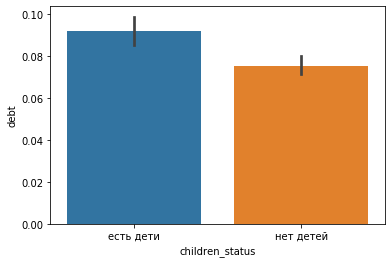

In [18]:
data_pivot = data.pivot_table(
    index = ['children_status'], 
    columns = 'debt_status',
    values ='debt',
    aggfunc = 'count')
print (data_pivot.sort_index(ascending = False))
 
sns.barplot (y = data['debt'], x = data ['children_status'])


<div class="alert alert-block alert-warning">
<b>Remarks:</b> 
    
Здорово, что самостоятельно разбираешься с визуализациями! Хочу подсказать тебе очень полезную библиотеку визуализаций: https://python-graph-gallery.com/ Тут ты можешь найти много классных примеров.
    
Также советую всегда убирать технический аутпут перед визуализациями при помощи `plt.show()`

**Вывод**

Среди клиентов банка, имеющих задолженности меньше тех, кто имеет детей. Соотвественно наличие детей положительно влияет на вероятность возварата кредита. 

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

debt_status            есть задолженность  нет задолженности
family_status                                               
женат / замужем                       931              11449
гражданский брак                      388               3789
вдовец / вдова                         63                897
в разводе                              85               1110
Не женат / не замужем                 274               2539


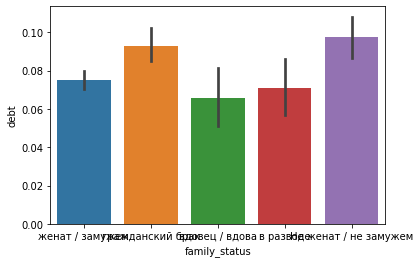

In [19]:
data_pivot = data.pivot_table(
    index = ['family_status'], 
    columns = 'debt_status',
    values ='debt',
    aggfunc = 'count')
print (data_pivot.sort_index(ascending = False))
import seaborn 
seaborn.barplot (y = data['debt'], x = data ['family_status'])

**Вывод**

Семейное положение слабо влияет на вероятность возврата кредита. Среди должников в каждом сегементе около 1-2 процентов должников или меньше. Но больше всего тех, кто не замужем\не женат. Меньше всего должников среди категории вдовец\вдова. 

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

debt_status             есть задолженность  нет задолженности
income                                                       
средний уровень дохода                 491               5213
низкий уровень дохода                  354               4109
высокий уровень дохода                 896              10462


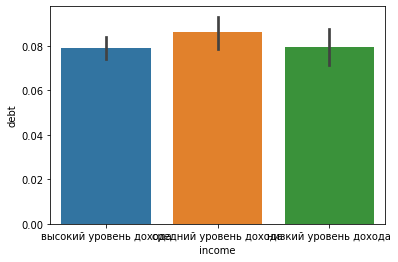

In [20]:
data_pivot = data.pivot_table(
    index = ['income'], 
    columns = 'debt_status',
    values ='debt',
    aggfunc = 'count')
print (data_pivot.sort_index(ascending = False))
import seaborn 
seaborn.barplot (y = data['debt'], x = data ['income'])

**Вывод**

Больше всего задолженностей среди клиентов со среднем уровнем дохода. В целом этот показатель не сильно влияет на вероятность возврата. Среди всех категорий примерно одинаковый процент должников 

- Как разные цели кредита влияют на его возврат в срок?

debt_status   есть задолженность  нет задолженности
category                                           
свадьба                      186               2162
обучение                     370               3652
недвижимость                 782              10058
автомобиль                   403               3912


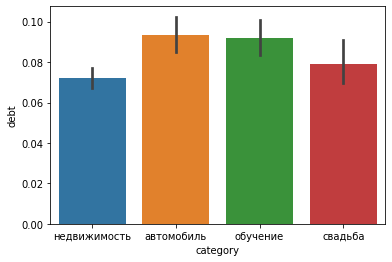

In [21]:
data_pivot = data.pivot_table(
    index = ['category'], 
    columns = 'debt_status',
    values ='debt',
    aggfunc = 'count')
print (data_pivot.sort_index(ascending = False))
 
import seaborn 
seaborn.barplot (y = data ['debt'], x = data ['category'])#здесь надо выбрать столбик из debt_status, но пока не получается

**Вывод**

По процентному соотношению больше всего должников среди тех, кто брал кредит на автомобили

## Шаг 4. Общий вывод

На вероятность возврата кредита положительно влияет наличие детей и супруга\супруги. Больше всего должников среди категории среднего уровня дохода. 
Наибольшую вероятность возврата кредита также имеют категории "вдовец\вдова" и те клиенты, которые берут кредиты на недвижимость. 

<div class="alert alert-block alert-warning">
    
<b>Remarks:</b>  Также давай напишем информативный общий вывод. Подумай об этом так: большинство заказчиков мало понимают в датасаенсе и начнут читать работу именно с него. Вывод должен содержать все обнаруженные инсайды и главное цифры.</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл;
- [ ]  файл изучен;
- [ ]  определены пропущенные значения;
- [ ]  заполнены пропущенные значения;
- [ ]  есть пояснение, какие пропущенные значения обнаружены;
- [ ]  описаны возможные причины появления пропусков в данных;
- [ ]  объяснено, по какому принципу заполнены пропуски;
- [ ]  заменен вещественный тип данных на целочисленный;
- [ ]  есть пояснение, какой метод используется для изменения типа данных и почему;
- [ ]  удалены дубликаты;
- [ ]  есть пояснение, какой метод используется для поиска и удаления дубликатов;
- [ ]  описаны возможные причины появления дубликатов в данных;
- [ ]  выделены леммы в значениях столбца с целями получения кредита;
- [ ]  описан процесс лемматизации;
- [ ]  данные категоризированы;
- [ ]  есть объяснение принципа категоризации данных;
- [ ]  есть ответ на вопрос: "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [ ]  есть ответ на вопрос: "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [ ]  есть ответ на вопрос: "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- [ ]  есть ответ на вопрос: "Как разные цели кредита влияют на его возврат в срок?";
- [ ]  в каждом этапе есть выводы;
- [ ]  есть общий вывод.